In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [3]:
dat = pd.read_csv("data_for_R.csv")
dat["answer"] = pd.Categorical(dat["answer"], ordered=True)

In [14]:
dat = pd.read_csv("data_for_R.csv")
features = ["sum_steps", "minute_asleep", "minute_awake",
            "minute_deep", "minute_light", "minute_rem", "minute_wake"]

features = ["sum_steps"]

mod = OrderedModel(dat["answer"], 
                   dat[features],
                   distr='logit')

In [15]:
res = mod.fit(method='bfgs', disp=False)

In [16]:
print(res.summary())

                             OrderedModel Results                             
Dep. Variable:                 answer   Log-Likelihood:                -11606.
Model:                   OrderedModel   AIC:                         2.323e+04
Method:            Maximum Likelihood   BIC:                         2.331e+04
Date:                Wed, 06 Dec 2023                                         
Time:                        00:26:56                                         
No. Observations:                9261                                         
Df Residuals:                    9250                                         
Df Model:                          11                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
sum_steps         0.0002   5.91e-06     30.049      0.000       0.000       0.000
minute_asleep     0.0018      0.000      5.

In [17]:
odds_ratios = np.exp(res.params)

In [18]:
conf_int = np.exp(res.conf_int())

In [19]:
or_ci = pd.DataFrame({'OR': odds_ratios, 'CI Lower': conf_int[0], 'CI Upper': conf_int[1]})

print("\nOdds Ratios and Confidence Intervals:")
print(or_ci)


Odds Ratios and Confidence Intervals:
                     OR  CI Lower  CI Upper
sum_steps      1.000178  1.000166  1.000189
minute_asleep  1.001788  1.001134  1.002443
minute_awake   0.996394  0.993481  0.999316
minute_deep    0.990059  0.987128  0.992998
minute_light   1.002130  1.000745  1.003518
minute_rem     1.000321  0.998080  1.002567
minute_wake    1.008779  1.003685  1.013899
1.0/2.0        0.131409  0.093596  0.184498
2.0/3.0        2.242975  2.095959  2.400304
3.0/4.0        1.886291  1.826104  1.948462
4.0/5.0        2.202235  2.138376  2.268001


# Multinomial

In [122]:
dat = pd.read_csv("data_for_R.csv")
bins = [0, 5000, 10000, np.inf]
labels = ['0-5000', '5000-10000', '10000+']
labels=[1, 2, 3]

dat["sum_steps"] = pd.cut(dat["sum_steps"], bins=bins, labels=labels, right=False).astype("category")

dat["answer"] = dat["answer"].astype("category")
features = ["minute_in_bed", "minute_asleep", 
            "minute_awake", "minute_deep", "minute_light", 
            "minute_rem", "minute_wake"]

dat["sum_steps"] = dat["sum_steps"].cat.reorder_categories([1, 2, 3])
x = pd.get_dummies(dat["sum_steps"], drop_first=True)
x = pd.concat([x, dat[features]], axis=1)
x = sm.add_constant(x)
y = dat["answer"]

In [124]:
mnlogit_mod = sm.MNLogit(y, x)
mnlogit_res = mnlogit_mod.fit()

Optimization terminated successfully.
         Current function value: 1.249962
         Iterations 9


In [125]:
print(mnlogit_res.summary())

                          MNLogit Regression Results                          
Dep. Variable:                 answer   No. Observations:                 9261
Model:                        MNLogit   Df Residuals:                     9221
Method:                           MLE   Df Model:                           36
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                 0.05103
Time:                        01:31:21   Log-Likelihood:                -11576.
converged:                       True   LL-Null:                       -12198.
Covariance Type:            nonrobust   LLR p-value:                4.035e-238
     answer=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4824      0.591      4.200      0.000       1.324       3.641
2                 0.4345      0.184      2.356      0.018       0.073       0.796
3                 1.0345      0.437     

In [126]:
params = mnlogit_res.params
conf = mnlogit_res.conf_int()

In [127]:
odd_ratios = np.exp(params)

In [128]:
ci_lower = np.exp(conf.iloc[:, 0])
ci_upper = np.exp(conf.iloc[:, 1])

In [129]:
ci_lower

answer               
2       const             3.758696
        2                 1.075759
        3                 1.194531
        minute_in_bed     0.978218
        minute_asleep     1.000197
        minute_awake      0.986945
        minute_deep       0.981530
        minute_light      0.990208
        minute_rem        0.990322
        minute_wake       0.982485
3       const             5.312969
        2                 1.945653
        3                 2.956246
        minute_in_bed     0.979670
        minute_asleep     1.002615
        minute_awake      0.985512
        minute_deep       0.975382
        minute_light      0.989103
        minute_rem        0.993855
        minute_wake       0.986110
4       const             1.253032
        2                 3.614536
        3                 9.752792
        minute_in_bed     0.970791
        minute_asleep     1.011286
        minute_awake      0.993704
        minute_deep       0.967332
        minute_light      0.99312

In [130]:
ci_upper

answer               
2       const             38.115889
        2                  2.216406
        3                  6.627783
        minute_in_bed      1.002290
        minute_asleep      1.024155
        minute_awake       1.024250
        minute_deep        1.006868
        minute_light       1.001051
        minute_rem         1.009580
        minute_wake        1.024353
3       const             49.749397
        2                  3.900040
        3                 15.721933
        minute_in_bed      1.002121
        minute_asleep      1.024915
        minute_awake       1.020645
        minute_deep        0.999596
        minute_light       0.999506
        minute_rem         1.012414
        minute_wake        1.026381
4       const             11.926018
        2                  7.281299
        3                 51.726177
        minute_in_bed      0.993882
        minute_asleep      1.034717
        minute_awake       1.029707
        minute_deep        0.991417
      

In [131]:
odd_ratios

,0,1,2,3
const,11.969380,16.257829,3.865706,0.701166
2,1.544124,2.754655,5.130158,10.069984
3,2.813733,6.817470,22.460513,71.359980
minute_in_bed,0.990181,0.990832,0.982269,0.977432
minute_asleep,1.012105,1.013704,1.022935,1.028757
minute_awake,1.005424,1.002924,1.011546,1.012796
minute_deep,0.994118,0.987415,0.979300,0.976539
minute_light,0.995615,0.994291,0.998339,0.998838
minute_rem,0.999905,1.003091,1.004470,0.999530
minute_wake,1.003200,1.006044,1.011623,1.015230


In [132]:
p_values = mnlogit_res.pvalues
p_values

,0,1,2,3
const,0.000027,1.024915e-06,1.865309e-02,5.649086e-01
2,0.018474,1.116865e-08,5.584953e-20,5.924181e-30
3,0.017952,6.716538e-06,2.650177e-13,1.362250e-22
minute_in_bed,0.111566,1.110546e-01,2.851101e-03,1.275053e-03
minute_asleep,0.046299,1.529470e-02,1.041718e-04,5.128338e-05
minute_awake,0.567630,7.438293e-01,2.061023e-01,2.037346e-01
minute_deep,0.364256,4.290659e-02,8.559954e-04,3.091454e-04
minute_light,0.113707,3.193033e-02,5.334794e-01,6.811417e-01
minute_rem,0.984511,5.131310e-01,3.453150e-01,9.244750e-01
minute_wake,0.764067,5.550800e-01,2.581961e-01,1.611068e-01


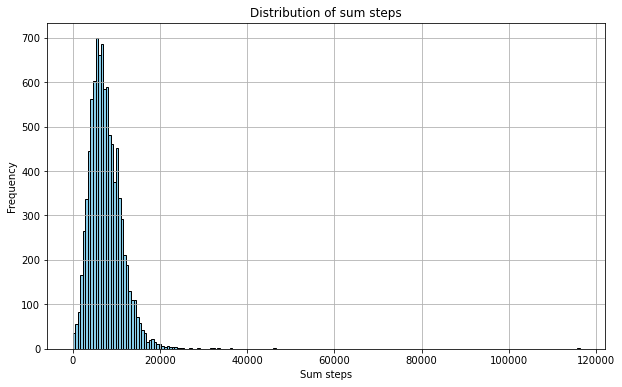

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(dat["sum_steps"], bins=200, color="skyblue", edgecolor="black")
plt.title("Distribution of sum steps")
plt.xlabel("Sum steps")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

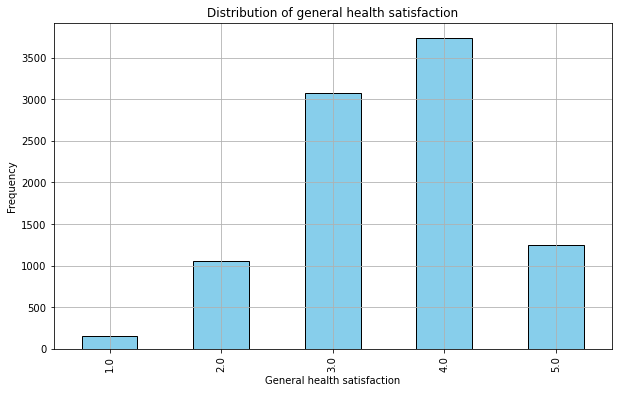

In [7]:
plt.figure(figsize=(10, 6))
dat["answer"].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
# plt.hist(dat["answer"], color="skyblue")
plt.title("Distribution of general health satisfaction")
plt.xlabel("General health satisfaction")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()